1. setup mario


In [1]:
!pip install gym_super_mario_bros==7.3.0 nes_py


[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
#import the game
import gym_super_mario_bros

#import controller
from nes_py.wrappers import JoypadSpace

#import movement
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [2]:
#setupo game
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)


C:\Python311\Lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(


In [3]:

done = True
for frame in range(10000):
    if done:
        env.reset()
    state, reward, done, info = env.step(env.action_space.sample())
    env.render()
env.close()
        

C:\Python311\Lib\site-packages\gym\utils\passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(
C:\Python311\Lib\site-packages\gym\utils\passive_env_checker.py:219: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
C:\Python311\Lib\site-packages\gym\utils\passive_env_checker.py:225: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):


ValueError: not enough values to unpack (expected 5, got 4)

2. process environment


In [4]:
!pip install pytorch


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pytorch
Failed to build pytorch
  Running setup.py install for pytorch: started
  Running setup.py install for pytorch: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\haha\AppData\Local\Temp\pip-install-axgnmbye\pytorch_8b93426bc5c9425f8762acb4590a8c53\setup.py", line 15, in <module>
      raise Exception(message)
  Exception: You tried to install "pytorch". The package named for PyTorch is "torch"
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  error: subprocess-exited-with-error
  
  Running setup.py install for pytorch did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\haha\AppData\Local\Temp

In [1]:
!pip install stable-baselines3[extra]

  Using cached stable_baselines3-1.8.0-py3-none-any.whl (174 kB)
  Using cached gym-0.21.0.tar.gz (1.5 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached torch-2.0.0-cp311-cp311-win_amd64.whl (172.3 MB)
  Using cached pandas-2.0.0-cp311-cp311-win_amd64.whl (11.2 MB)
  Using cached matplotlib-3.7.1-cp311-cp311-win_amd64.whl (7.6 MB)
  Using cached importlib_metadata-4.13.0-py3-none-any.whl (23 kB)
  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)
  Using cached tensorboard-2.12.2-py3-none-any.whl (5.6 MB)
  Using cached rich-13.3.4-py3-none-any.whl (238 kB)
  Using cached stable_baselines3-1.7.0-py3-none-any.whl (171 kB)
  Using cached stable_baselines3-1.6.2-py3-none-any.whl (170 kB)
  Using cached stable_baselines3-1.6.1-py3-none-any.whl (180 kB)
  Using cached stable_baselines3-1.6.0-py3-none-any.whl (177 kB)
  Using cached stable_baselines3-1.5.0-py3-none-any.whl (177 kB)
  Using cached stabl

Reason for being yanked: re-release with new wheels
  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [634 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\gym
  copying gym\core.py -> build\lib\gym
  copying gym\error.py -> build\lib\gym
  copying gym\logger.py -> build\lib\gym
  copying gym\version.py -> build\lib\gym
  copying gym\__init__.py -> build\lib\gym
  creating build\lib\gym\envs
  copying gym\envs\registration.py -> build\lib\gym\envs
  copying gym\envs\__init__.py -> build\lib\gym\envs
  creating build\lib\gym\spaces
  copying gym\spaces\box.py -> build\lib\gym\spaces
  copying gym\spaces\dict.py -> build\lib\gym\spaces
  copying gym\spaces\discrete.py -> build\lib\gym\spaces
  copying gym\spaces\multi_binary.py -> build\lib\gym\spaces
  copying gym\spaces\multi_discrete.py -> build\lib\gym\spaces
  copying gym\spaces\space

In [2]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

In [6]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify the controls 
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

In [7]:
state = env.reset()

In [8]:
state, reward, done, info = env.step([5])

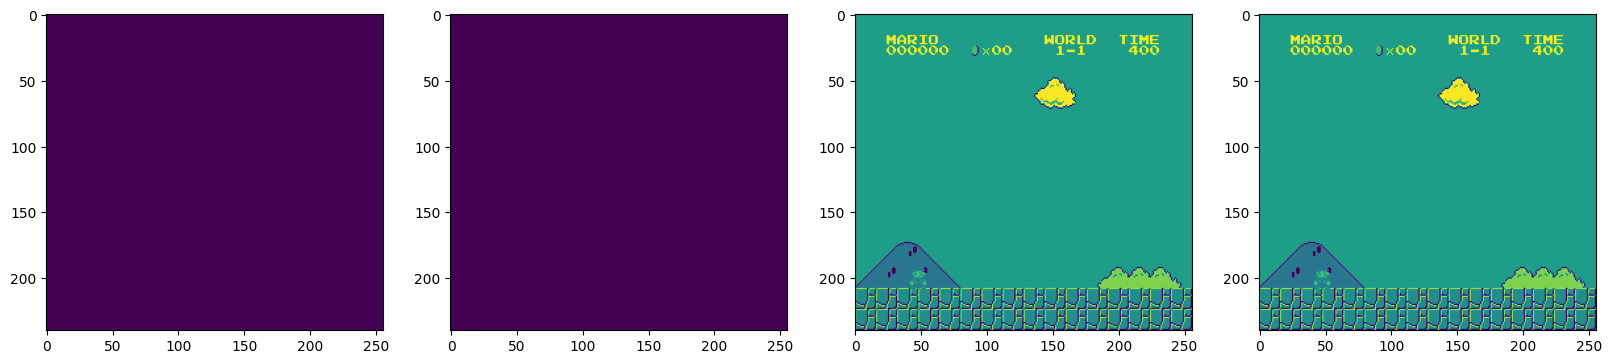

In [9]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

3. apply model

In [10]:
# Import os for file path management
import os 
# Import PPO for algos
from stable_baselines3 import PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [11]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [12]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/

SyntaxError: unterminated string literal (detected at line 2) (215323498.py, line 2)

In [13]:

# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

NameError: name 'CHECKPOINT_DIR' is not defined

In [14]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, 
            n_steps=512) 

NameError: name 'LOG_DIR' is not defined

In [15]:
# Train the AI model, this is where the AI model starts to learn
model.learn(total_timesteps=1000000, callback=callback)

NameError: name 'model' is not defined

In [ ]:
model.save('thisisatestmodel')

4. test project


In [ ]:
# Load model
model = PPO.load('./train/best_model_1000000')

In [ ]:
state = env.reset()

In [ ]:
# Start the game 
state = env.reset()
# Loop through the game
while True: 
    
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()